<a href="https://colab.research.google.com/github/sksj007/lstm-traffic-flow-prediction/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (3).zip


In [ ]:
import zipfile
import zipfile
import io
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
    zip_ref.extractall()

print ("Files extracted!")

Files extracted!


In [ ]:
import os
for file in os.listdir():
  print(file)

.config
archive (2).zip
traffic.csv
archive.zip
archive (1).zip
sample_data


In [ ]:
import pandas as pd
df = pd.read_csv("traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [ ]:
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df.head()

,DateTime,Junction,Vehicles,ID,Hour,Day,Month,DayOfWeek
0,2015-11-01 00:00:00,1,15,20151101001,0,1,11,6
1,2015-11-01 01:00:00,1,13,20151101011,1,1,11,6
2,2015-11-01 02:00:00,1,10,20151101021,2,1,11,6
3,2015-11-01 03:00:00,1,7,20151101031,3,1,11,6
4,2015-11-01 04:00:00,1,9,20151101041,4,1,11,6


In [ ]:
df.drop(['ID', 'DateTime'], axis=1, inplace=True)
df.head()

,Junction,Vehicles,Hour,Day,Month,DayOfWeek
0,1,15,0,1,11,6
1,1,13,1,1,11,6
2,1,10,2,1,11,6
3,1,7,3,1,11,6
4,1,9,4,1,11,6


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
Scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
Scaled_df.head()

,Junction,Vehicles,Hour,Day,Month,DayOfWeek
0,0.0,0.078212,0.000000,0.0,0.909091,1.0
1,0.0,0.067039,0.043478,0.0,0.909091,1.0
2,0.0,0.050279,0.086957,0.0,0.909091,1.0
3,0.0,0.033520,0.130435,0.0,0.909091,1.0
4,0.0,0.044693,0.173913,0.0,0.909091,1.0


In [ ]:
from collections.abc import Sequence
import numpy as np
Sequence_length = 10
X = []
y = []
for i in range(Sequence_length, len(Scaled_df)):
  X.append(Scaled_df.iloc[i-Sequence_length:i].values)
  y.append(Scaled_df.iloc[i] ['Vehicles'])

X = np.array(X)
y = np.array(y)

print ("X shape:", X.shape)
print ("y shape:", y.shape)

X shape: (48110, 10, 6)
y shape: (48110,)


In [ ]:
print(Scaled_df.columns)
print(Scaled_df.head())

Index(['Junction', 'Vehicles', 'Hour', 'Day', 'Month', 'DayOfWeek'], dtype='object')
   Junction  Vehicles      Hour  Day     Month  DayOfWeek
0       0.0  0.078212  0.000000  0.0  0.909091        1.0
1       0.0  0.067039  0.043478  0.0  0.909091        1.0
2       0.0  0.050279  0.086957  0.0  0.909091        1.0
3       0.0  0.033520  0.130435  0.0  0.909091        1.0
4       0.0  0.044693  0.173913  0.0  0.909091        1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (38488, 10, 6) (38488,)
Test shape: (9622, 10, 6) (9622,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=64, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 8.8453e-04 - val_loss: 0.0011
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 7.8381e-04 - val_loss: 9.6674e-04
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 7.9249e-04 - val_loss: 8.7874e-04
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 6.9734e-04 - val_loss: 8.3473e-04
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 7.1030e-04 - val_loss: 9.4708e-04
Epoch 9/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 6.8746e-04 - val_loss: 8.1163e-04
Epoch 10/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 6.7519e-04 - val_loss: 8.2459e-04


301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


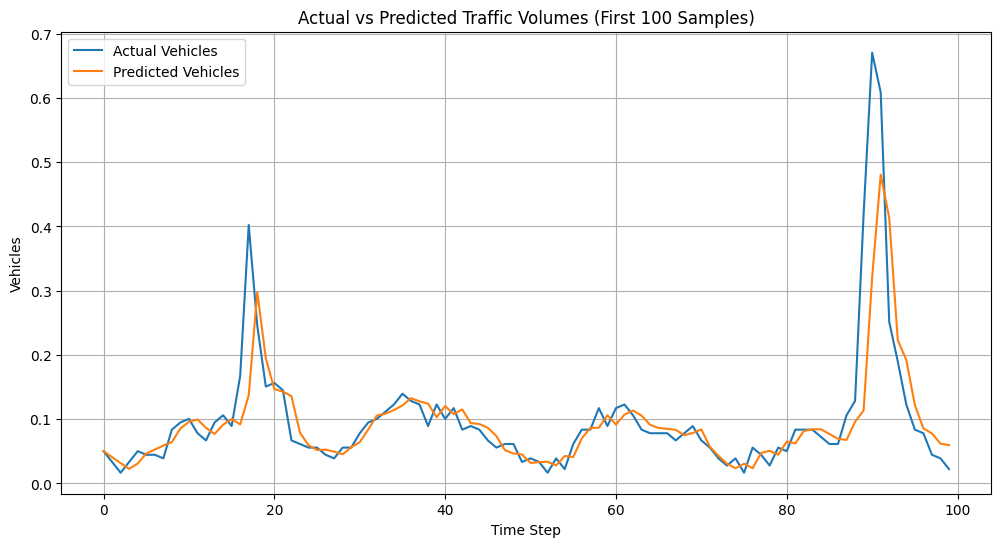

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test[:100], label='Actual Vehicles')
plt.plot(y_pred[:100], label='Predicted Vehicles')
plt.title('Actual vs Predicted Traffic Volumes (First 100 Samples)')
plt.xlabel('Time Step')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.02871562468889395


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE):{test_loss}")

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Test Loss (MSE):0.0008245870703831315


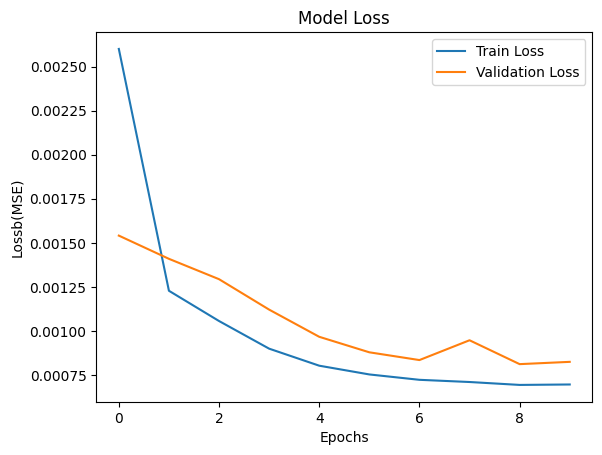

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Lossb(MSE)')
plt.legend()
plt.show()